<a href="https://colab.research.google.com/github/Annergeticaura/Linear-Regression-From-Scratch/blob/main/LiR_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working on a linear regression model from scratch based on the abalone dataset

In [ ]:
import pandas as pd
df=pd.read_csv('abalone.data.csv')

In [ ]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df["Sex"].count()

4177

<Axes: xlabel='Age', ylabel='Height'>

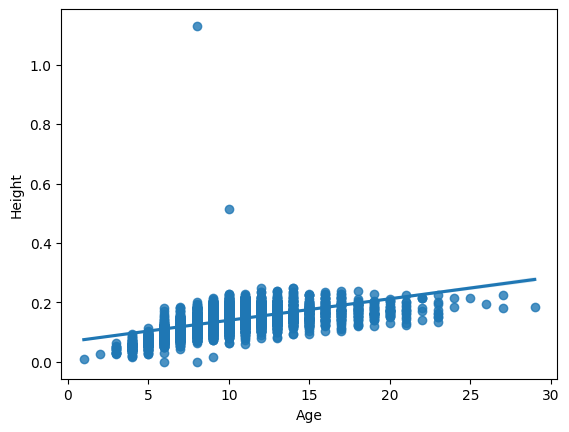

In [ ]:
import seaborn as sns
sns.regplot(x = "Age",
            y = "Height",
            data = df,
            dropna = True)

Working on One Hot Encoding

In [ ]:
#3 columns for respective sex
df["M"] = df.iloc[:, 0]
df["F"] = df.iloc[:, 0]
df["I"] = df.iloc[:, 0]
df.head(5)

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age,M,F,I
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,M,M,M
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,M,M,M
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,F,F,F
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,M,M,M
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,I,I,I


In [ ]:
y=df['Age']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Age, Length: 4177, dtype: int64

In [ ]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age,M,F,I
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,M,M,M
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,M,M,M
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,F,F,F
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,M,M,M
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,I,I,I


In [ ]:
df = df.drop('Age', axis=1)


In [ ]:
#One Hot Enoding of M F I

df.loc[df["M"]!="M", "M"] = 0
df.loc[df["M"]=="M", "M"] = 1
df.loc[df["F"]!="F", "F"] = 0
df.loc[df["F"]=="F", "F"] = 1
df.loc[df["I"]!="I", "I"] = 0
df.loc[df["I"]=="I", "I"] = 1
df.head(5)

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1


In [ ]:
df = df.drop('Sex', axis=1)

In [ ]:
import numpy as np
X = np.asarray(df.values.tolist())
df.head(5)

,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1


In [ ]:
# X.shape
# y.shape

Scaling of the independent variables (Assuming they are normalized)

In [ ]:
#Feature Scaling for Independent Variables

for i in range(X.shape[1]-3):
  X[:,i] = (X[:,i] - int(np.mean(X[:,i])))/np.std(X[:,i])

#Feature Scaling for Dependent Variables
y = (y - int(np.mean(y)))/np.std(y)


In [ ]:
#Adding the feature X0 = 1, so we have the equation: y =  (W1 * X1) + (W0 * X0)
X = np.concatenate((X,np.ones((4177,1))), axis = 1)

In [ ]:
X
y = np.asarray(y.tolist())
y

array([ 1.86116742, -0.62038914,  0.        , ...,  0.        ,
        0.31019457,  0.93058371])

In [ ]:
#Dataframing independent variables

IV=pd.DataFrame(X)
IV

,0,1,2,3,4,5,6,7,8,9,10
0,3.789187,3.678398,2.271529,1.048273,1.011551,0.921523,1.077695,1.0,0.0,0.0,1.0
1,2.914759,2.670618,2.151975,0.459894,0.448327,0.442514,0.502924,1.0,0.0,0.0,1.0
2,4.413778,4.232677,3.227962,1.380702,1.155737,1.291045,1.508772,0.0,1.0,0.0,1.0
3,3.664269,3.678398,2.988854,1.052352,0.970999,1.040135,1.113618,1.0,0.0,0.0,1.0
4,2.748201,2.569840,1.912867,0.418086,0.403269,0.360398,0.395155,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,4.705254,4.535011,3.945287,1.808985,1.667144,2.180634,1.788973,0.0,1.0,0.0,1.0
4173,4.913451,4.434233,3.227962,1.970101,1.978044,1.957097,1.871596,1.0,0.0,0.0,1.0
4174,4.996730,4.786956,4.901721,2.398383,2.367796,2.623148,2.212866,1.0,0.0,0.0,1.0
4175,5.204927,4.887734,3.586625,2.232169,2.392578,2.381362,2.126651,0.0,1.0,0.0,1.0


Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
      X, y, test_size = 1/3, random_state = 0 )

In [ ]:
#X.shape




Linear Regression Model

In [ ]:
class MLR():

  def __init__(self):
    pass

  def forward(self,X,y,W):

     y_pred = sum(W * X)
     loss = ((y_pred-y)**2)/2    #Squared error calculated
     return loss, y_pred

  def updateslope(self,X,y_pred,y,W,alpha,index):
    for i in range(X.shape[1]):
        #alpha = learning rate, rest of the RHS is derivative of loss function
        W[i] -= (alpha * (y_pred-y[index])*X[index][i]) #Gradient Descent
    return W

  def train(self, X, y, epochs, alpha, random_state):
    #Weight Initialization

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows)


    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateslope(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, Y_test, W_trained):
      test_pred = []
      test_loss = []
      test_indices = [i for i in range(X_test.shape[0])]
      for i in test_indices:
          loss, y_test_pred = self.forward(X_test[i], W_trained, Y_test[i])
          test_pred.append(y_test_pred)
          test_loss.append(loss)
      return test_pred, test_loss

  def predict(self, W_trained, X_sample):
      prediction = sum(W_trained * X_sample)
      return prediction


  def plot(self, loss, epochs):
    import matplotlib.pyplot as plt
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Cost Slope Analysis')
    plt.show()

Residuals are calculated by mean squared error method

In [ ]:
# def forward(self,X,y,W):

#      y_pred = sum(W * X)
#      loss = ((y_pred-y)**2)/2    #Squared error calculated
#      return loss, y_pred

Updating Weight or slope is done by Gradient method where W=W-learning rate*dW

In [ ]:
# def updateslope(self,X,y_pred,y,W,alpha,index):
#   for i in range(X.shape[1]):
#       #alpha = learning rate, rest of the RHS is derivative of loss function
#       W[i] -= (alpha * (y_pred-y[index])*X[index][i]) #Gradient Descent
#   return W

Randomly initializing weights by W= random(number of columns)/root over(number of rows)
Updating using the forward function


In [ ]:
# def train(self, X, y, epochs, alpha, random_state):
#     #Weight Initialization

#     num_rows = X.shape[0] #Number of Rows
#     num_cols = X.shape[1] #Number of Columns
#     W = np.random.randn(1,num_cols) / np.sqrt(num_rows)


#     #Calculating Loss and Updating Weights
#     train_loss = []
#     num_epochs = []
#     train_indices = [i for i in range(X.shape[0])]
#     for j in range(epochs):
#       cost=0
#       np.random.seed(random_state)
#       np.random.shuffle(train_indices)
#       for i in train_indices:
#         loss, y_pred = self.forward(X[i],y[i],W[0])
#         cost+=loss
#         W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
#       train_loss.append(cost)
#       num_epochs.append(j)
#     return W[0], train_loss, num_epochs


Testing the predicted and true values based on the X_test array

In [ ]:
# def test(self, X_test, Y_test, W_trained):
#     test_pred = []
#     test_loss = []
#     test_indices = [i for i in range(X_test.shape[0])]
#     for i in test_indices:
#         loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
#         test_pred.append(y_test_pred)
#         test_loss.append(loss)
#     return test_pred, test_loss

In [ ]:
# df.count()

Prediction of individual tuple

In [ ]:
# def predict(self, W_trained, X_sample):
#     prediction = sum(W_trained * X_sample)
#     return prediction

Plotting the Loss vs Epoch graph

In [ ]:
# def plot(self, loss, epochs):
#     import matplotlib.pyplot as plt
#     plt.plot(epochs, loss)
#     plt.xlabel('Number of Epochs')
#     plt.ylabel('Loss')
#     plt.title('Cost Slope Analysis')
#     plt.show()

Fitting the model

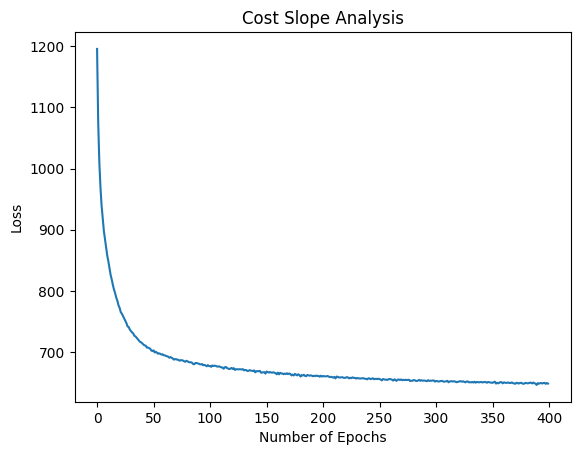

In [ ]:
model= MLR()

#Training
W_trained, train_loss, num_epochs = model.train(X_train, Y_train, epochs=400, alpha=0.0001,random_state=0)

#Testing
test_pred, test_loss = model.test(X_test, Y_test, W_trained)
model.plot(train_loss, num_epochs)

In [ ]:
# df.head(5)
test_pred

[27.6881013131629,
 -5.642944184344926,
 16.338182715170277,
 -9.02203642280925,
 26.845728791409545,
 16.115778537547186,
 -9.918088848302055,
 -5.578531986093582,
 -8.63903302375824,
 0.0,
 -5.1447014244973,
 -2.891336684702355,
 9.024454619879895,
 0.0,
 -11.778842047577001,
 -14.87728357474448,
 -7.044076240285777,
 62.15264181900803,
 -16.515178049869466,
 -9.642449269381249,
 -7.5997953419839,
 -13.619378788936013,
 -4.918213525227686,
 0.0,
 6.712594438968855,
 6.804761776111841,
 -6.497389243254101,
 52.237777389374166,
 6.559869123680134,
 31.73082064740283,
 -3.912315457644763,
 -8.0146501758819,
 0.0,
 44.71869950504744,
 -9.088810379179792,
 -12.039879590585686,
 -5.13490099727789,
 0.0,
 -4.7034497068259045,
 16.312038166924626,
 42.65841517720119,
 16.351739506123174,
 50.10214373381448,
 47.117380702581485,
 15.654156119744739,
 10.027737247071022,
 -7.421930703252549,
 8.08271280758817,
 13.377352468238332,
 -12.351641696859723,
 27.55856727050699,
 -8.111616691665558,


Calculating the Error

In [ ]:
#Calculate naive linear regression model error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, y_pred)
mse

0.4706217936985449